### #04 - Projeto - Explorando Agrupamentos

In [3]:
# notebook para verificar agrupamentos do dataset sobre Fireballs, baseado no método K-Means
'''
Medidas da tabela: 
kt(kiloton): Unidade que serve para avaliar a potência de uma arma nuclear, comparando a energia produzida
pela explosão com a energia produzida pela explosão de 1 000 toneladas de trinitrotolueno (ou T. N. T.)
 
altitude: distância em quilômetros (km) entre o evento registrado e a Terra (geoide de referência)
----------------------------------------------------------------------------------------------------
Descrição:
O objetivo dessa etapa é aplicar o K-means nos conjuntos de dados usados no projeto para descobrir possíveis grupos. 
Testem diferentes características (colunas) e diferentes números de grupos (valor de K).
'''
import numpy as np
import pandas as pd
import seaborn as sns
from math import log 
from sklearn.cluster import KMeans  # para agrupamento dos dados
from sklearn import preprocessing # normalizar escalas da tabela


df = pd.read_csv('datasets/cneos_fireball_data.csv', on_bad_lines='warn')
df.head(3)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-04-15 08:22:01,20.1S,36.0E,41.4,17.2,1.6,-14.7,8.8,3.097000e+12,6.300
1,2023-04-06 14:47:39,57.4N,109.9E,31.2,22.1,8.6,3.6,-20.0,7.200000e+10,0.230
2,2023-04-01 00:02:03,16.8S,76.0E,61.8,46.4,21.4,-40.6,7.1,2.400000e+10,0.086


In [17]:
np.random.seed(3) # definindo a seed dp ambiente de teste

#### Total Radiated Energy (J) x Calculated Total Impact Energy (kt)

<AxesSubplot:xlabel='Total Radiated Energy (J) - log[10]', ylabel='Calculated Total Impact Energy (kt) - log[100]'>

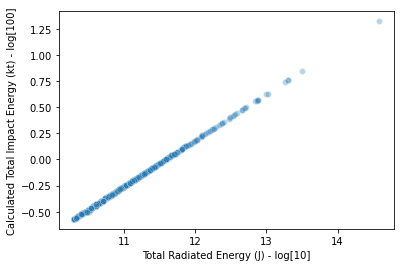

In [23]:
# Foram usadas escalas logarítmicas para visualizar o gráfico das variáveis selecionadas (como no notebook anterior)

radiated_energy_log = np.log10(df['Total Radiated Energy (J)'])
df['Total Radiated Energy (J) - log[10]'] = radiated_energy_log

#impact_energy_log = np.log10(df['Calculated Total Impact Energy (kt)'])
#df['Calculated Total Impact Energy (kt) - log[10]'] = impact_energy_log
impact_energy_log = np.array([log(x,100) for x in df['Calculated Total Impact Energy (kt)']])
df['Calculated Total Impact Energy (kt) - log[100]'] = impact_energy_log

sns.scatterplot(data=df, y='Calculated Total Impact Energy (kt) - log[100]', x='Total Radiated Energy (J) - log[10]',
               alpha=0.3) 

############################## passar colunas do coluna pra o arquivo .csv

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[Text(0.5, 0, 'n_clusters'), Text(0, 0.5, 'Inertia')]

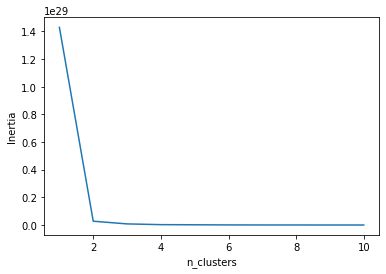

In [28]:
df_group = df[['Total Radiated Energy (J)','Calculated Total Impact Energy (kt)']]

# gráfico do elbow method para verificar melhor n_clusters
inertias = []
for i in range(1,11): # de 1 a 10
    kmeans = KMeans(n_clusters=i) # i cluster(s)
    kmeans.fit(df_group) # agrupe
    inertias.append(kmeans.inertia_) # colete dispersao

elbow = sns.lineplot(x=range(1,11), y=inertias)
elbow.set(xlabel='n_clusters', ylabel='Inertia')

- A tortura do gráfico nos sugere o n_clusters = 2. Verificaremos no gráfico de dispersão:

<AxesSubplot:xlabel='Total Radiated Energy (J)', ylabel='Calculated Total Impact Energy (kt)'>

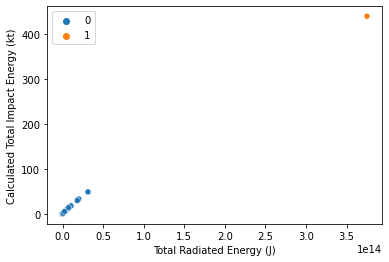

In [29]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_group) # agrupa pontos num espaço n_dim=2
sns.scatterplot(data=df_group, x='Total Radiated Energy (J)', y='Calculated Total Impact Energy (kt)', hue=kmeans.labels_)

In [30]:
# o dataset se apresentou em dois grupos nessa clusterização. Vamos observar os dados pertencentes ao grupo 1:
df[kmeans.labels_==1]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
369,2013-02-15 03:20:33,54.8N,61.1E,23.3,18.6,12.8,-13.3,-2.4,3.750000e+14,440.0


In [ ]:
#  COMENTÁRIO:
# Pelos valores da Energia Radiada e da Energia de Impacto, vemos que o registro se refere ao evento de Cheliabynski, 
# na Sibéria, comentado no notebook #3 - Visualização - Fireballs
# Isto nos sugere uma forte discrepância de valores entre este meteoro e os demais do dataset. Como verificado no arquivo
# das terminologias do projeto (definições_importantes), este evento estaria melhor classificado como um Bólido e não como 
# Fireball, como os demais registros do projeto

<AxesSubplot:xlabel='1'>

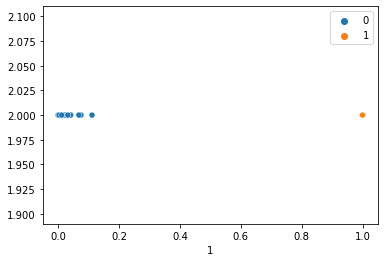

In [32]:
# Ainda com estas variáveis, testaremos o plot com as escalas normalizadas para n_clusters=2

normalized_df = df[['Total Radiated Energy (J)','Calculated Total Impact Energy (kt)']]

x = normalized_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)

### os nomes das colunas são removidos

kmeans = KMeans(n_clusters=2)
kmeans.fit(normalized_df)
sns.scatterplot(data=normalized_df, x=1, y=2, hue=kmeans.labels_) 


#### Altitude(km) x Velocity (km/s)
- Será observado agora o comportamento de duas colunas com unidades de medida e escalas mais próximas

C:\Users\iaraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iaraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iaraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iaraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

[Text(0.5, 0, 'n_clusters'), Text(0, 0.5, 'Inertia')]

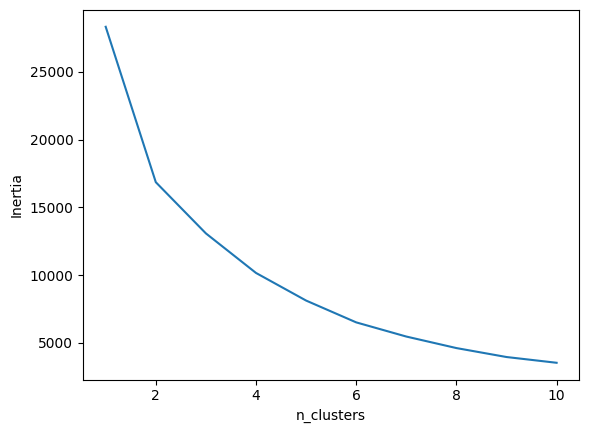

In [8]:
df_group2=df[['Altitude (km)', 'Velocity (km/s)']].dropna()  # remove valores NaN

# gráfico do elbow method 
inertias = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_group2) # agrupe
    inertias.append(kmeans.inertia_) # colete dispersao

elbow = sns.lineplot(x=range(1,11), y=inertias)
elbow.set(xlabel='n_clusters', ylabel='Inertia')

C:\Users\iaraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Altitude (km)', ylabel='Velocity (km/s)'>

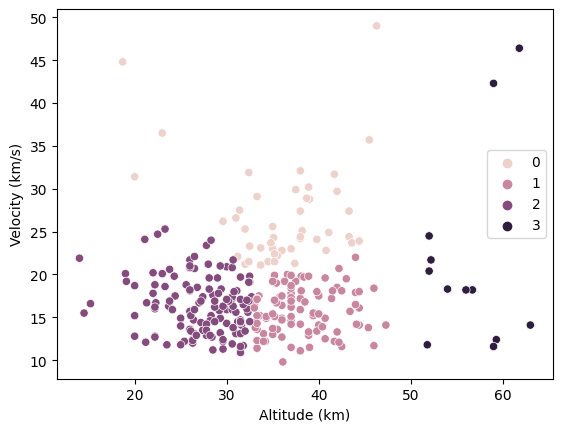

In [30]:
np.random.seed(6)
# de 8 em diante, a melhora no agrupamento não é significativa se comparada a valores menores
# testaremos com 4 clusteres

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_group2) # agrupa 8 centroides num espaço n_dim=2
sns.scatterplot(data=df_group2, x='Altitude (km)', y='Velocity (km/s)', hue=kmeans.labels_)

In [ ]:
# é observada uma possível classificação dos meteoros baseada na velocidade e altitude. Os grupos 1 e 2 são mais densos
# e representam a maioria dos meteoros, possuem um intervalo de velocidade similar mas o grupo 1 foi registrado mais alto
# em relação ao geoide de referência. Outro destaque é a classificação da maioria de velocidade acima de 25 km/s em um 
# grupo, indicando que meteoros desse grupo, por visualização do gráfico, ocorrem com menos frequência

# Os eventos de emissão de luz registrados na atmosfera terrestre possuem uma classificação baseada na Energia Emitida (a
# luz irradiada) em: bólidos, fireballs e meteoros (por ordem decrescente de emissão). Usar outras variáveis nesse método 
# de classificação permite observar os eventos sob outras perspectivas, como é o caso da velocidade, pois permite perceber 
# que parte dos eventos são em velocidades abaixo de 25. Juntando a outras características como massa, poderíamos estudar
# também a força de impacto dos eventos, por exemplo.